
# Waffle Charts, Word Clouds, and Regression Plots


## Tabla de contenido

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Explorando datasets con Pandas](#0)<br>
2.  [Descargando y preparando datos](#2)<br>
3.  [Visualizando datos con Matplotlib](#4) <br>
4.  [Waffle Charts](#6) <br>
5.  [Nubes de palabras](#8) <br>
6.  [Gráficos de regresión](#10) <br> 
    </div>
    <hr>

# Explorando datastes con Pandas y Matplotlib</a>

Dataset: Inmigración a Canadá entre 1980 y 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) from United Nation's website


# Descargando y preparando datos<a id="2"></a>


In [3]:
import numpy as np
import pandas as pd 
from PIL import Image # convertir imágenes en arreglos

Descargamos el dataset y lo importamos en un dataframe Pandas.

In [4]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Veamos los primeros 5 elementos:


In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Veamos el tamaño del dataset.


In [6]:
# imprimimos las dimensiones del dataframe
print(df_can.shape)

(195, 43)


Modificamos el dataset original para que sea más fácil crear las visualizaciones.

In [7]:
# removemos columnas innecesarias
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# renombramos las columnas para que tengan sentido
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# hacemos que todas las etiquetas de columnas sean de tipo string
df_can.columns = list(map(str, df_can.columns))

# establecemos el nombre de país como índice
df_can.set_index('Country', inplace = True)

# agregamos una columna Total
df_can['Total'] =  df_can.sum (axis = 1)

# years
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing Data using Matplotlib<a id="4"></a>


In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # necesario para los waffle charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


# Waffle Charts <a id="6"></a>

Un `waffle chart` es una herramienta de visualización que es normalmente creada para desplegar progresos hacia un objetivo. Por lo general, es una opción eficaz cuando intenta agregar funciones de visualización interesantes a un objeto visual que consta principalmente de celdas, como un tablero de Excel.


Recordemos el caso de estudio previo acerca de Dinamarca, Noruega y Suecia.

In [9]:
# creamos un nuevo dataframe para estos países
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# veamos el dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


A diferencia de R, en Python no hay herramientas incoporadas para crear waffle charts. Por tanto, aprenderemos a crear uno desde el scratch.

**Paso 1.** Determinar la proporción de cada categoría respecto al total.

In [10]:
# computanos la proporción de cada categoría respecto al total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# imprimimos las proporciones
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Paso 2.** Definir el tamaño global del waffle chart.

In [11]:
width = 40 # ancho
height = 10 # alto

total_num_tiles = width * height # número total de losas

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Paso 3.** Utilizamos la proporción de cada categoría para determinar el número respectivo de mosaicos.

In [12]:
# computamos el número de mosaicos (losas) para cada categoría
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# imprimimos el número de losas por categoría
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Basados en el cálculo de proporciones, Dinamarca ocupa 129 mosaicos, Noruega 77 y Suecia 194.

**Paso 4.** Crear una matriz que se asemeje al waffle y poblarla.

In [13]:
# inicializamos el waffle chart como una matriz vacía
waffle_chart = np.zeros((height, width))

# definimos un índice para recorrer el waffle chart
category_index = 0
tile_index = 0

# poblamos el waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # si el número de mosaicos poblados para la categoría actual es igual a sus correspondientes mosaicos asignados...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...procedemos la siguiente categoría
            category_index += 1       
            
        # establecemos el valor de la clase a un entero, lo que incrementa con la clase
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Echémosle un vistazo a la matriz.

In [14]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

La matriz consiste de 3 categorías y el número total de instancias de cada categoría coincide con el número total de mosaicos asignados a cada categoría.


**Paso 5.** Asigne la matriz del gráfico "waffle" en un objeto visual.

<Figure size 432x288 with 0 Axes>

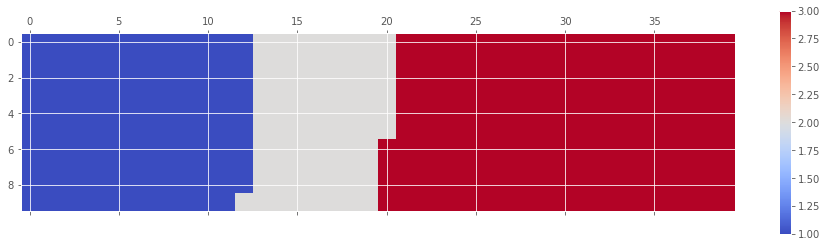

In [15]:
# instanciamos un nuevo objeto figure
fig = plt.figure()

# usamos matshow para desplegar un waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6.** Embellecemos el gráfico.


([], <a list of 0 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

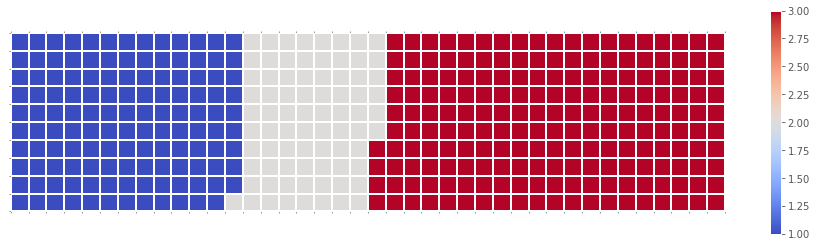

In [16]:
# instanciamos un nuevo objeto figure
fig = plt.figure()

# usamos matshow para desplegar el waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# obtenemos el eje
ax = plt.gca()

# establecemos ticks menores
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# agregamos grillas basados en los ticks menores
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Paso 7.** Creamos una leyenda y la agregamos.

<Figure size 432x288 with 0 Axes>

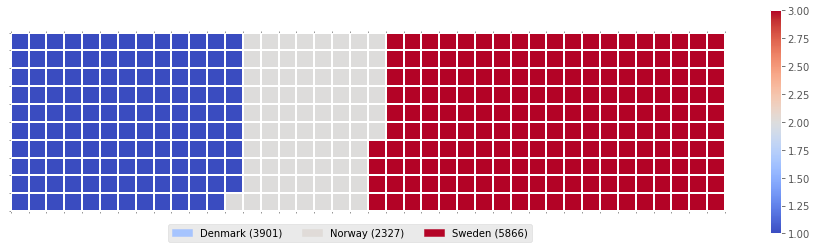

In [17]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# computamos la suma acumulada de categorías individuales para coincidir los esquemas de colores entre chart y legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# creamos una leyenda
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# agregamos una leyenda al chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Y ahí lo tenemos! un Waffle Chart.

Ahora, sería ineficiente repetir estos 7 pasos cada vez que queramos crear un waffle chart, así que combinémoslos en una función llamada "create_waffle_chart" que tendrá los siguientes parámetros como entrada:

> 1.  **categories**: Categorías únicas o clases en el dataframe.
> 2.  **values**: Valores correspodientes a las categorías o clases.
> 3.  **height**: Altura.
> 4.  **width**: Ancho.
> 5.  **colormap**: Clase de mapa de colores.
> 6.  **value_sign**: Para que nuestra función sea más generalizable agregaremos este parámetro para abordar los signos que podrían estar asociados con un valor, como %, $, y así sucesivamente. **value_sign** tiene valor por defecto un string vacío.


In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # computamos la proporción de cada categoría respecto al total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # computamos el número total de mosaicos
    total_num_tiles = width * height # número total de mosaicos
    print ('Total number of tiles is', total_num_tiles)
    
    # computamos el número de mosaicos para cada categoría
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # imprimimos el número de mosaicos por categoría
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # inicializamos el waffle chart como una matriz de ceros
    waffle_chart = np.zeros((height, width))

    # definimos índices para recorrer el waffle chart
    category_index = 0
    tile_index = 0

    # poblamos el waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # 
            waffle_chart[row, col] = category_index
    
    # instanciamos un nuevo objeto figure
    fig = plt.figure()

    # usamos matshow para mostrar el waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # obtenemos los ejes
    ax = plt.gca()

    #
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    #
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    #
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # creamos una leyenda
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # agregamos la leyenda
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Ahora usemos esta función. Definamos los parámetros de entrada:


In [19]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categorías
values = df_dsn['Total'] # valores correspondientes de las categorías

colormap = plt.cm.coolwarm # color map class

Llamemos a la función:


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

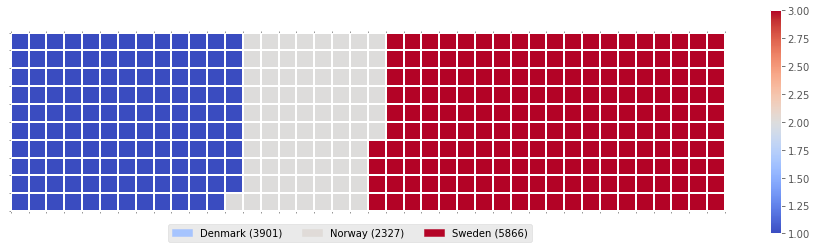

In [20]:
create_waffle_chart(categories, values, height, width, colormap)

Parece existir un nuevo paquete en Python para generar `waffle charts` llamado [PyWaffle](https://github.com/ligyxy/PyWaffle), pero parece que el repo todavía está siendo construído.


# Nubes de palabras (Word Clouds) <a id="8"></a>

Las nubes de palabras funcionan de forma simple: mientras más aparece en una fuente de datos textuales una palabra, más grande y resaltada aparece en la nube.


Existe un paquete Python para generar nubes de palabras. Se llama `word_cloud` y fue desarrollado por Andreas Mueller. Puede aprender más acerca de él en el siguiente [link](https://github.com/amueller/word_cloud/).

Usémoslo.


Instalemos el paquete.


In [35]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - wordcloud==1.4.1 -> python[version='2.7.*|3.5.*|3.6.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





ModuleNotFoundError: No module named 'wordcloud'

Las nubes de palabras se usan para realizar análisis de alto nivel y visualización de datos de texto.En consecuencia, vamos a apartarnos del conjunto de datos de inmigración y trabajar con un ejemplo que implica analizar datos de texto. Intentemos analizar una novela corta escrita por **Lewis Carroll**: las aventuras de Alicia en el país de las maravillas. Descarguemos el archivo .txt de la novela.


In [22]:
# descargamos el archivo y lo guardamos como alice_novel.txt
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt

# abrimos el archivo y lo leemos en la variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


Next, let's use the stopwords that we imported from `word_cloud`. We use the function _set_ to remove any redundant stopwords.


In [ ]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.


In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.


In [ ]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.


In [ ]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it _alice_mask.png_.


In [ ]:
# download image
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Let's take a look at how the mask looks like.


In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.


In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!


Unfortunately, our immmigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.


Let's recall how our data looks like.


In [ ]:
df_can.head()

And what was the total immigration from 1980 to 2013?


In [ ]:
total_immigration = df_can['Total'].sum()
total_immigration

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.


In [ ]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.


In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

In [ ]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!


# Gráficos de regresión (Regression Plots) <a id="10"></a>

> Seaborn es una librería de visualización Python de alto nivel basada en Matplolib. Puede aprender más de ella en el siguiente link:[link](https://seaborn.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) and more about _seaborn_ regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


Instalemos Seaborn


In [23]:
# instalamos seaborn
!conda install -c anaconda seaborn --yes

# importamos la librería
import seaborn as sns

print('Seaborn installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/marcos/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py38_0         160 KB  anaconda
    conda-4.9.0                |           py38_0         3.1 MB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         7.2 MB

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py38_0 --> ana

Creamos un nuevo dataframe que almacena el número total de inmigrantes a Canadá por año entre 1980 y 2013.

In [24]:
# usamos el método sum() para obtener la población total por año
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# cambiamos years a tipo float (será útil luego)
df_tot.index = map(float, df_tot.index)

# reseteamos el índice para ponerlo de vuelta como columna en el dataframe df_tot
df_tot.reset_index(inplace=True)

# renombramos las columnas
df_tot.columns = ['year', 'total']

# vemos el dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Con Seaborn, generar un gráfico de regresión es tan simple como llamar a la función **regplot**.

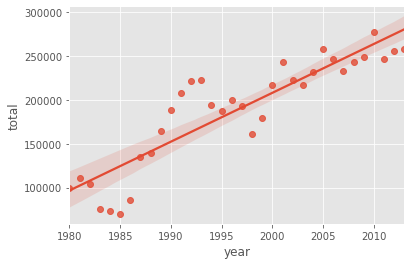

In [25]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Personalizemos. Cambiemos el color a verde.


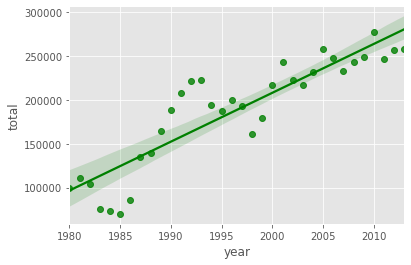

In [26]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

También puede personalizar los marcadores, en vez de círculos usemos "+":


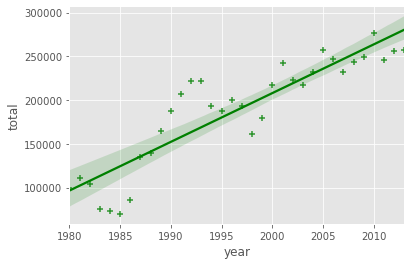

In [27]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Hagamos el gráfico más agradable a la vista:


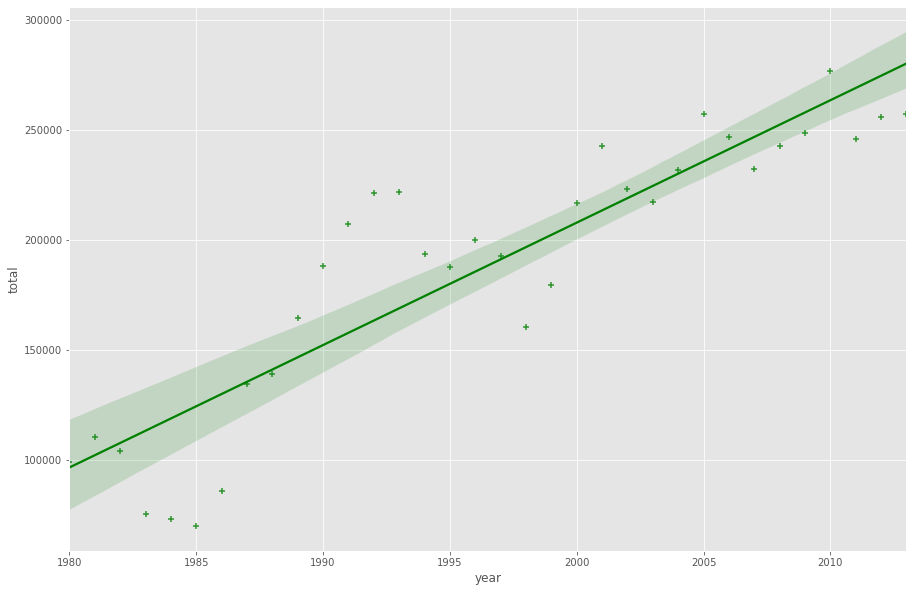

In [28]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Incrementemos el tamaño de los marcadores para que coincidan con el nuevo tamaño de la figura, y agreguemos un título y etiquetas a los ejes.


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

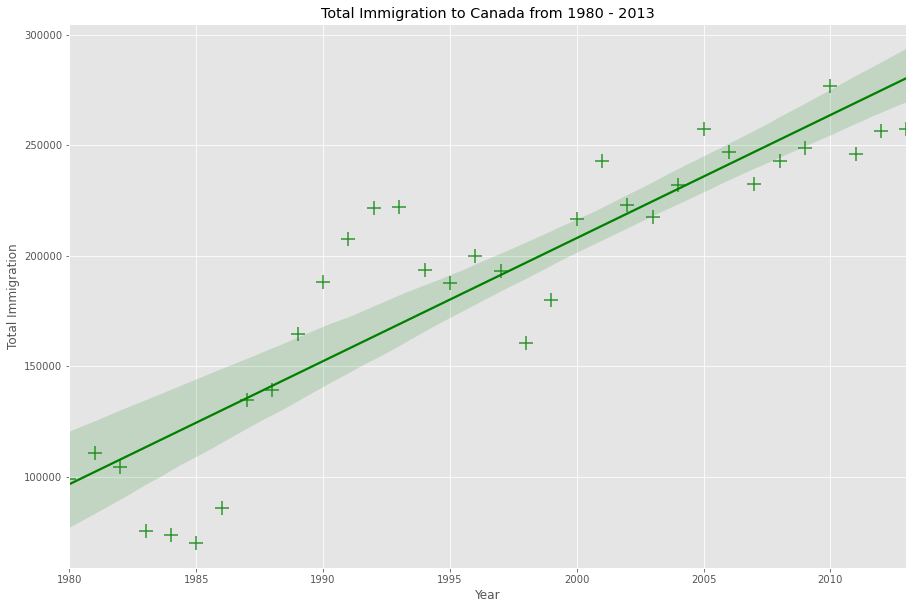

In [29]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Incrementemos el tamaño de las etiquetas de marca, el título y los ejes:

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

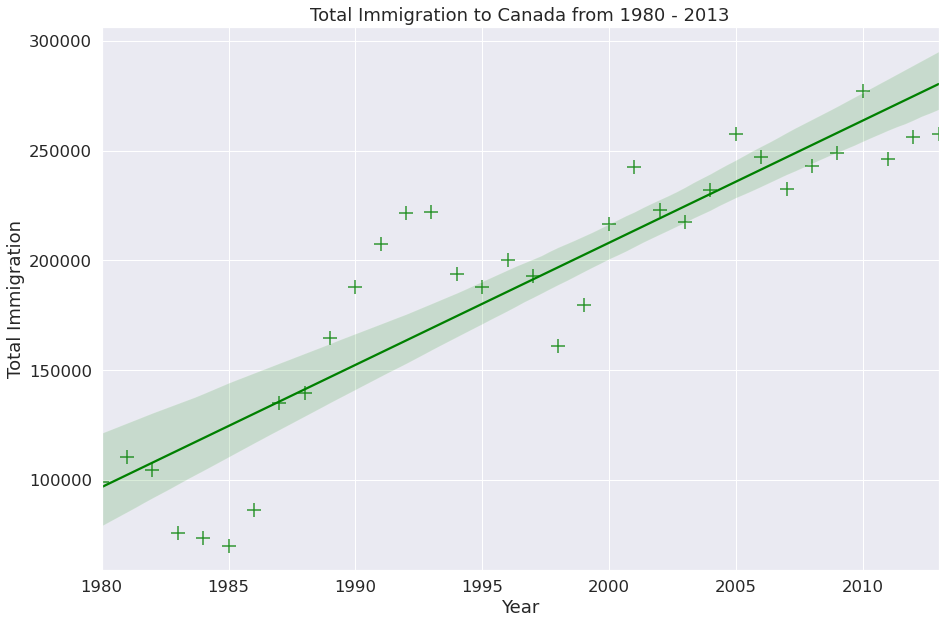

In [30]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Cambiemos el estilo del background:

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

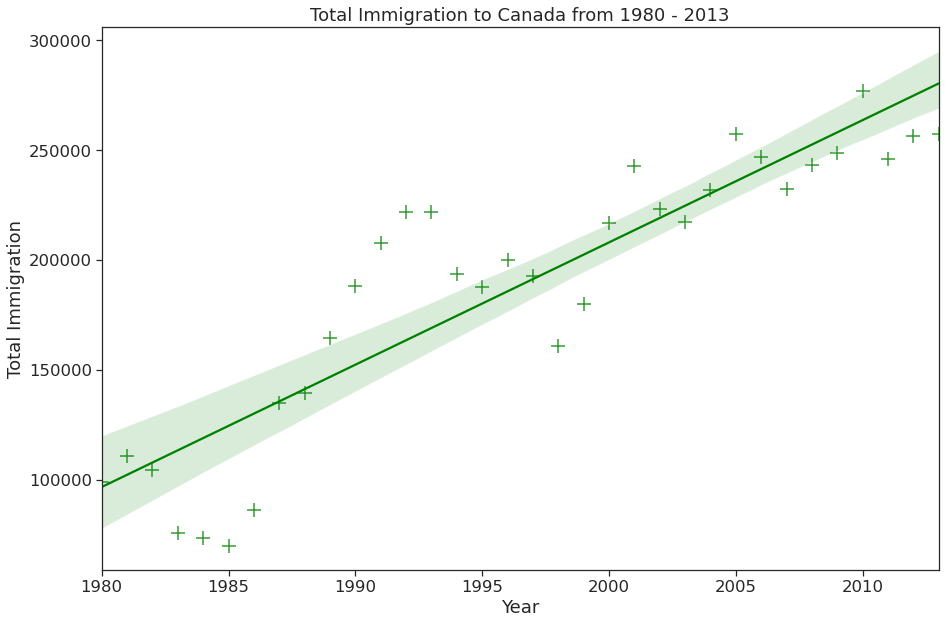

In [31]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # cambiamos el background a blanco
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

O a blanco con grillas:


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

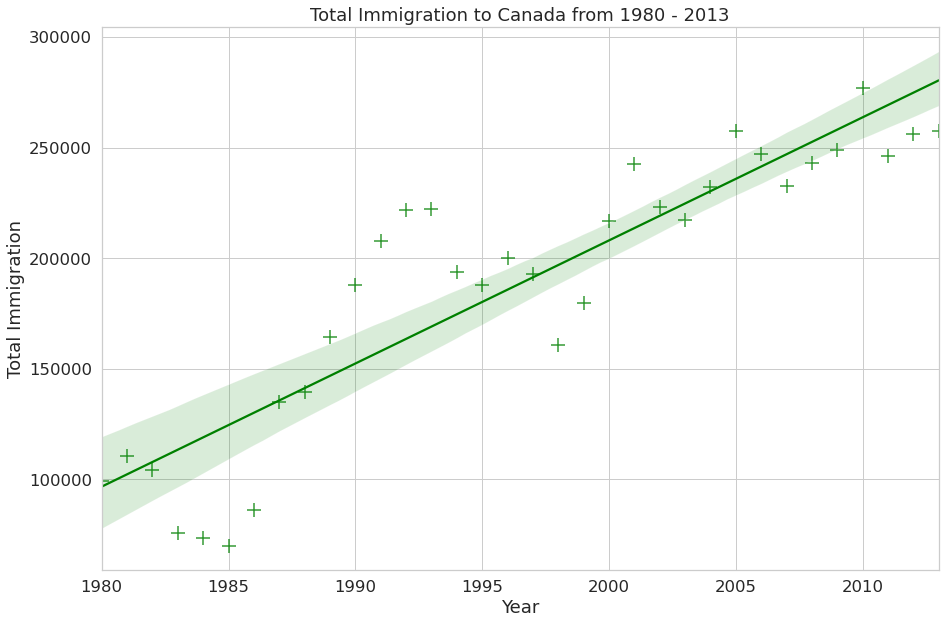

In [33]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

**Cree un gráfico de regresión con una recta de regresión para visualizar la inmigración total desde Dinamarca, Suecia y Noruega a Canadá entre 1980 y 2013**



Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

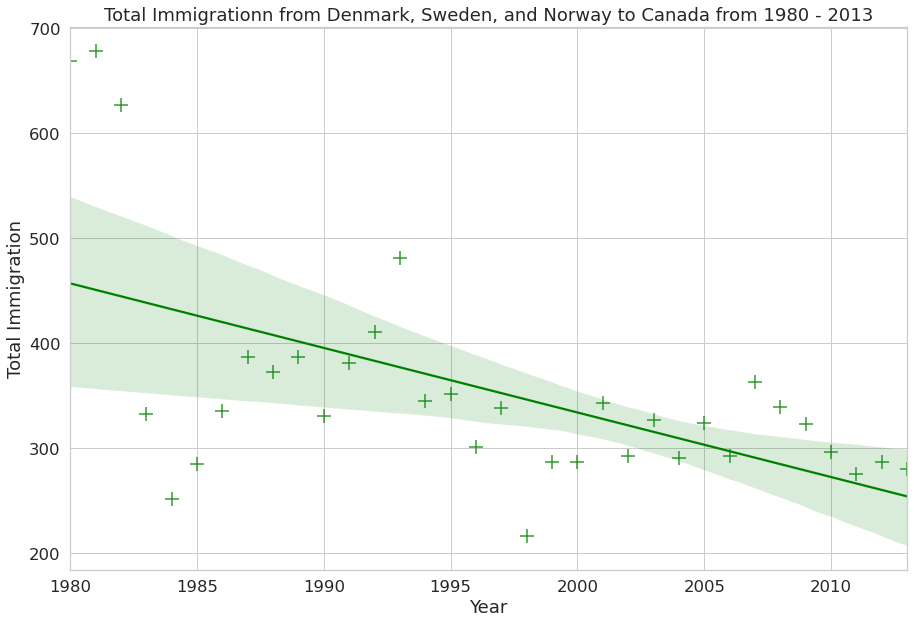

In [34]:
# creamos el dataframe df_countries
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# creamos df_total sumando a través de los 3 países para cada año
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reseteamos el índice
df_total.reset_index(inplace=True)

# renombramos las columnas
df_total.columns = ['year', 'total']

# cambiamos la columna year de string a int para crear el gráfico de dispersión
df_total['year'] = df_total['year'].astype(int)

# definimos el tamaño de la figura
plt.figure(figsize=(15, 10))

# definimos el estilo de background y el tamaño de la fuente
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generamos el gráfico
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
